In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [ ]:
kaggle_credentials = json.load(open('kaggle.json'))

In [ ]:
#setting up the kaggle api
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:01<00:00, 27.9MB/s]
100% 2.04G/2.04G [01:02<00:00, 35.3MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
#unzip the downloaded dataset
with ZipFile('/content/plantvillage-dataset.zip','r') as Zip:
  Zip.extractall()

In [ ]:
print(os.listdir('/content/plantvillage dataset'))
print(os.listdir('/content/plantvillage dataset/color'))
print(os.listdir('/content/plantvillage dataset/color')[:5])
print(os.listdir('/content/plantvillage dataset/grayscale'))
print(os.listdir('/content/plantvillage dataset/segmented'))

['segmented', 'grayscale', 'color']
['Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Peach___Bacterial_spot', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___healthy', 'Tomato___Late_blight', 'Blueberry___healthy', 'Tomato___Target_Spot', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Tomato___healthy', 'Apple___healthy', 'Raspberry___healthy', 'Tomato___Bacterial_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Potato___healthy', 'Grape___Esca_(Black_Measles)', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Leaf_Mold', 'Soybean___healthy', 'Tomato___Septoria_leaf_spot', 'Apple___Black_rot', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Potato___Early_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', '

In [ ]:
print(os.listdir('/content/plantvillage dataset/color/Grape___healthy'))

['2383094b-208b-472d-9711-e35dbee4b7b9___Mt.N.V_HL 6114.JPG', 'f5310751-1f5c-426e-9e50-52bb5b7a2145___Mt.N.V_HL 8950.JPG', 'd68b653c-4fe7-49ee-80d4-1f0c84092242___Mt.N.V_HL 6077.JPG', '0f0596ab-ea6e-472b-a7d5-0a80b1d1ebb2___Mt.N.V_HL 9011.JPG', 'b07129a6-b8b0-4715-b76f-f89bd40c6770___Mt.N.V_HL 8994.JPG', '945a58bf-8495-4319-92c3-72dbf42116c8___Mt.N.V_HL 6082.JPG', '0e599f33-3a12-462e-adc1-b47a0d1fc6d8___Mt.N.V_HL 9126.JPG', 'e96d6ab6-6d0b-4e3e-bce0-b37903b4614c___Mt.N.V_HL 6174.JPG', '789501fb-f627-40eb-bb6d-ffc25e179ad0___Mt.N.V_HL 8908.JPG', '97c0552c-1cd6-4813-9608-3735b9867f98___Mt.N.V_HL 6046.JPG', '9466c0cc-2ae1-429e-b07e-eb75b94b2cf9___Mt.N.V_HL 9080.JPG', '6f771370-1fb8-440e-a23f-4e0f29dbd65b___Mt.N.V_HL 6150.JPG', '61a531ba-3d52-4af3-8828-c2dbba4d3b1d___Mt.N.V_HL 8941.JPG', '63e38ffd-dfb4-4fc0-aee2-0e6da78a9915___Mt.N.V_HL 6028.JPG', '4035c446-454c-4873-9b74-18f7ea951f78___Mt.N.V_HL 9091.JPG', '509b9b28-8ecf-4713-a3b0-8b741212ab63___Mt.N.V_HL 8960.JPG', '9155a721-9e2c-4b58-99b

In [ ]:
print(len(os.listdir('/content/plantvillage dataset/color')))

38


In [ ]:
# base directory
base_dir  ='/content/plantvillage dataset/color'

(256, 256, 3)


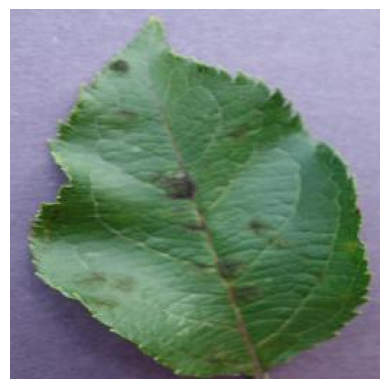

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img = mping.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img_size =224
batch_size = 32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img

In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 # use 20% of the data for validation
)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [ ]:
print(train_generator.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

Convolutional Neural Network

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
print(train_generator.samples)
print(validation_generator.samples)

43456
10849


Model Training

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size,## steps per epoch
    epochs = 5,
    validation_data = validation_generator,

    validation_steps = validation_generator.samples // batch_size , ## validation steps
)

Epoch 1/5


<ipython-input-23-e5696c766699>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1358/1358 [==============================] - 112s 79ms/step - loss: 0.9869 - accuracy: 0.7303 - val_loss: 0.4575 - val_accuracy: 0.8532
Epoch 2/5
1358/1358 [==============================] - 107s 79ms/step - loss: 0.2964 - accuracy: 0.9058 - val_loss: 0.3939 - val_accuracy: 0.8800
Epoch 3/5
1358/1358 [==============================] - 104s 77ms/step - loss: 0.1325 - accuracy: 0.9557 - val_loss: 0.4243 - val_accuracy: 0.8868
Epoch 4/5
1358/1358 [==============================] - 107s 78ms/step - loss: 0.0896 - accuracy: 0.9709 - val_loss: 0.5305 - val_accuracy: 0.8716
Epoch 5/5
1358/1358 [==============================] - 107s 78ms/step - loss: 0.0605 - accuracy: 0.9804 - val_loss: 0.5941 - val_accuracy: 0.8593


In [ ]:
print("Evaluating the model......")
val_loss,val_accuracy = model.evaluate(validation_generator,steps = validation_generator.samples//batch_size)
print(f"The accuracy is: {val_accuracy*100:.2f} %")


Evaluating the model......
339/339 [==============================] - 18s 52ms/step - loss: 0.5941 - accuracy: 0.8593
The accuracy is: 85.93 %


Plotting the accuracy

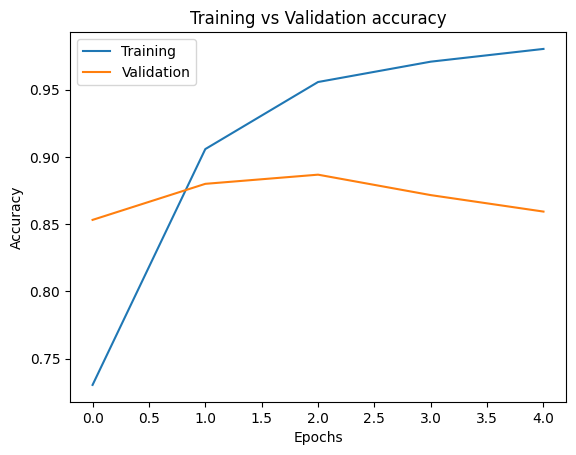

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],label = 'Training')
plt.plot(history.history['val_accuracy'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation accuracy')
plt.show()

Plotting the loss

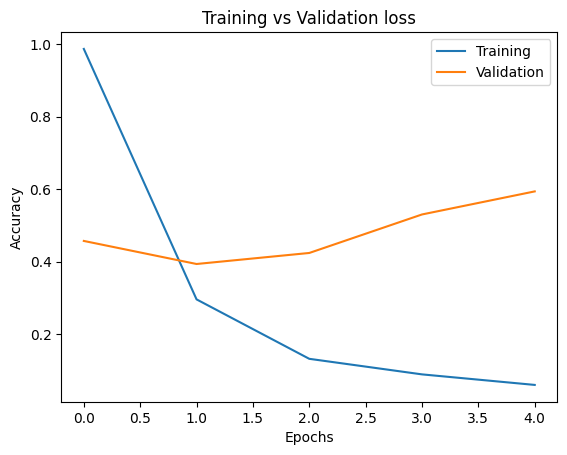

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],label = 'Training')
plt.plot(history.history['val_loss'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation loss')
plt.show()

Building a predictive System

In [ ]:
def load_and_preprocess_image(image_path,target_size = (224,224)):
  img = Image.open(image_path)
  img = img.resize(target_size)
  img_array = np.array(img)
  img_array = np.expand_dims(img_array,axis = 0)
  img_array = img_array.astype('float32')/255
  return img_array


In [ ]:
def predict_image_class(model,image_path,class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions,axis = 1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name


In [ ]:
#creating mapping from class indices to class
class_indices = { v: k for k,v in train_generator.class_indices.items()}

In [ ]:
print(class_indices)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG'
predicted_class_name = predict_image_class(model,image_path,class_indices)
print("Predicted Class Name: ",predicted_class_name)

1/1 [==============================] - 0s 18ms/step
Predicted Class Name:  Apple___Black_rot


In [ ]:
model.save('plant_disease_model.h5')

In [ ]:
##from google.colab import drive
##drive.mount('/content/drive')

In [ ]:
model.save('drive/MyDrive/trained_models/plant_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
